In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

gdp = pd.read_csv('gdp.csv', skiprows=4)
population = pd.read_csv('population.csv', skiprows=4)
inflation = pd.read_csv('inflation.csv', skiprows=4)
unemployment = pd.read_csv('unemployment.csv', skiprows=4)
debt = pd.read_csv('debt.csv', skiprows=4)
export = pd.read_csv('export.csv', skiprows=4)

In [3]:
def melt_indicator(df, value_name):
    # Ищем столбец страны
    country_col = [col for col in df.columns if 'Country' in col][0]
    # Все года (столбцы, которые состоят только из цифр)
    year_cols = [col for col in df.columns if col.isdigit()]
    return df.melt(id_vars=[country_col], value_vars=year_cols,
                   var_name='Year', value_name=value_name).rename(columns={country_col: 'Country'})

In [4]:
gdp_long = melt_indicator(gdp, 'GDP')
population_long = melt_indicator(population, 'Population')
inflation_long = melt_indicator(inflation, 'Inflation')
unemployment_long = melt_indicator(unemployment, 'Unemployment')
debt_long = melt_indicator(debt, 'Debt')
export_long = melt_indicator(export, 'Export')

df = gdp_long \
    .merge(population_long, on=['Country', 'Year']) \
    .merge(inflation_long, on=['Country', 'Year']) \
    .merge(unemployment_long, on=['Country', 'Year']) \
    .merge(debt_long, on=['Country', 'Year']) \
    .merge(export_long, on=['Country', 'Year'])

df['Year'] = df['Year'].astype(int)


df = df[df['Year'].between(2000, 2023)]


In [5]:
import pycountry

country_names = [country.name for country in pycountry.countries]
df = df[df['Country'].isin(country_names)]

In [6]:

print(df.head())

           Country  Year           GDP  Population   Inflation  Unemployment  \
10640        Aruba  2000  1.873453e+09     90588.0    4.044021           NaN   
10642  Afghanistan  2000  3.521418e+09  20130327.0         NaN         7.935   
10644       Angola  2000  9.129595e+09  16194869.0  324.996872        16.682   
10645      Albania  2000  3.480355e+09   3089027.0    0.050018        19.023   
10646      Andorra  2000  1.432606e+09     65685.0         NaN           NaN   

       Debt        Export  
10640   NaN  1.393587e+09  
10642   NaN           NaN  
10644   NaN           NaN  
10645   NaN  7.000834e+08  
10646   NaN           NaN  


In [7]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
              Year           GDP    Population    Inflation  Unemployment  \
count  4464.000000  4.372000e+03  4.464000e+03  3742.000000   3885.000000   
mean   2011.500000  3.541925e+11  3.510683e+07     6.383390      7.952065   
std       6.922962  1.591328e+12  1.398921e+08    17.908900      5.971430   
min    2000.000000  1.396473e+07  9.544000e+03   -16.859691      0.100000   
25%    2005.750000  4.497096e+09  8.993958e+05     1.619483      3.842000   
50%    2011.500000  1.968678e+10  6.109178e+06     3.524489      6.088000   
75%    2017.250000  1.321855e+11  1.993442e+07     7.003607     10.649000   
max    2023.000000  2.772071e+13  1.438070e+09   557.201817     37.320000   

              Debt        Export  
count  1229.000000  3.750000e+03  
mean     60.085020  1.109398e+11  
std      38.604359  2.982005e+11  
min       1.845685  8.129395e+06  
25%      32.224127  1.972588e+09  
50%      52.355408  1.059805e+10  
75%      79.363524  6.972985e+10  
m

In [8]:
print("📊 Dataset size:", df.shape)
print("\n🧾 Data types:\n", df.dtypes)
print("\n🔍 Missing values:\n", df.isnull().sum())

📊 Dataset size: (4464, 8)

🧾 Data types:
 Country          object
Year              int64
GDP             float64
Population      float64
Inflation       float64
Unemployment    float64
Debt            float64
Export          float64
dtype: object

🔍 Missing values:
 Country            0
Year               0
GDP               92
Population         0
Inflation        722
Unemployment     579
Debt            3235
Export           714
dtype: int64


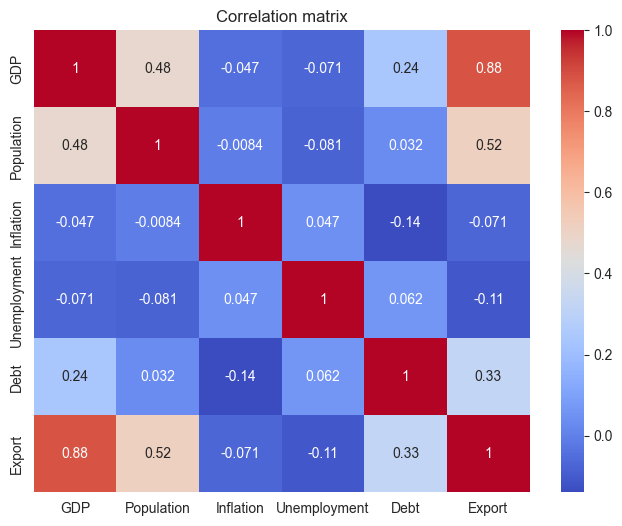

In [9]:

plt.figure(figsize=(8, 6))
sns.heatmap(df[['GDP','Population','Inflation','Unemployment','Debt','Export']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

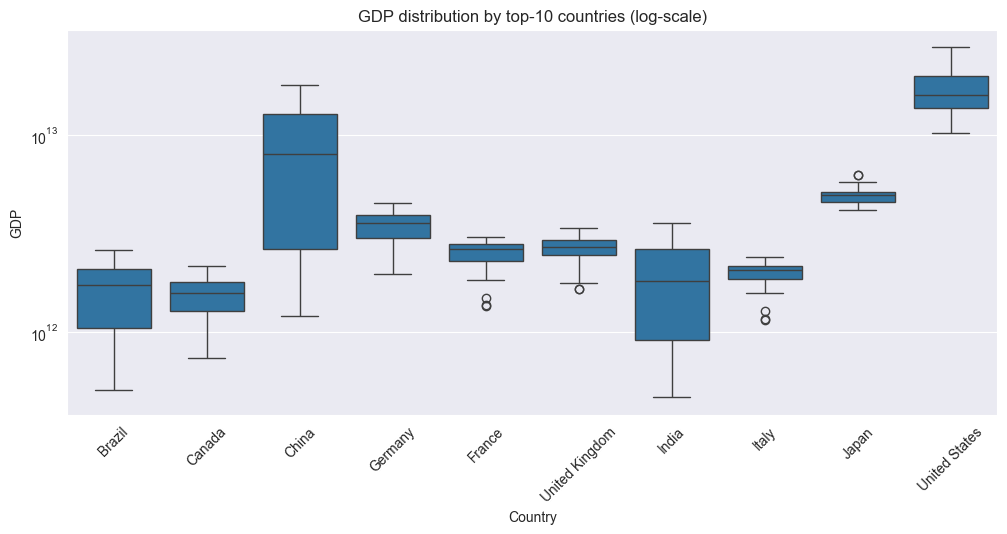

In [10]:
top10 = df.groupby('Country')['GDP'].mean().sort_values(ascending=False).head(10).index
plt.figure(figsize=(12, 5))
sns.boxplot(x='Country', y='GDP', data=df[df['Country'].isin(top10)])
plt.xticks(rotation=45)
plt.title('GDP distribution by top-10 countries (log-scale)')
plt.yscale('log')
plt.show()

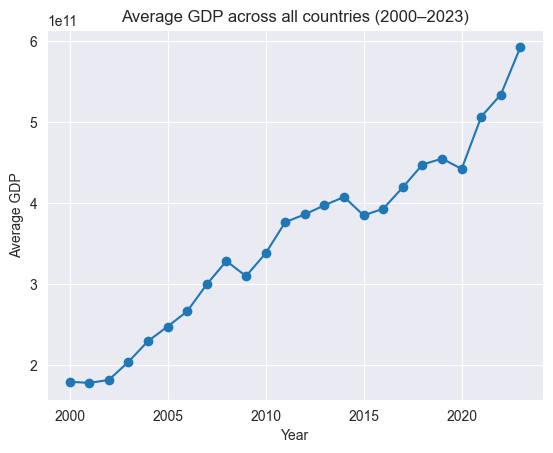

In [11]:
gdp_trend = df.groupby('Year')['GDP'].mean()
plt.plot(gdp_trend.index, gdp_trend.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.title('Average GDP across all countries (2000–2023)')
plt.show()


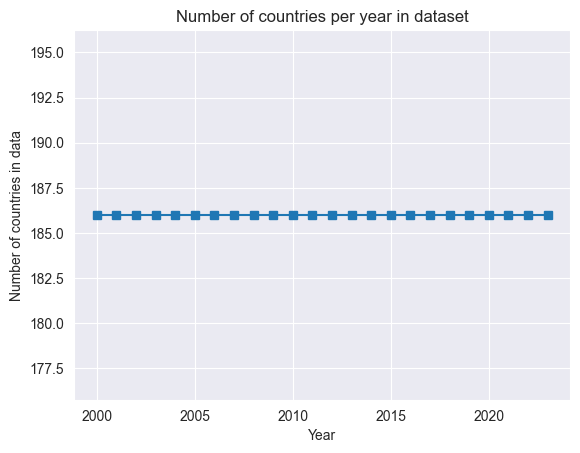

In [12]:
countries_by_year = df.groupby('Year')['Country'].nunique()
plt.plot(countries_by_year.index, countries_by_year.values, marker='s')
plt.xlabel('Year')
plt.ylabel('Number of countries in data')
plt.title('Number of countries per year in dataset')
plt.show()


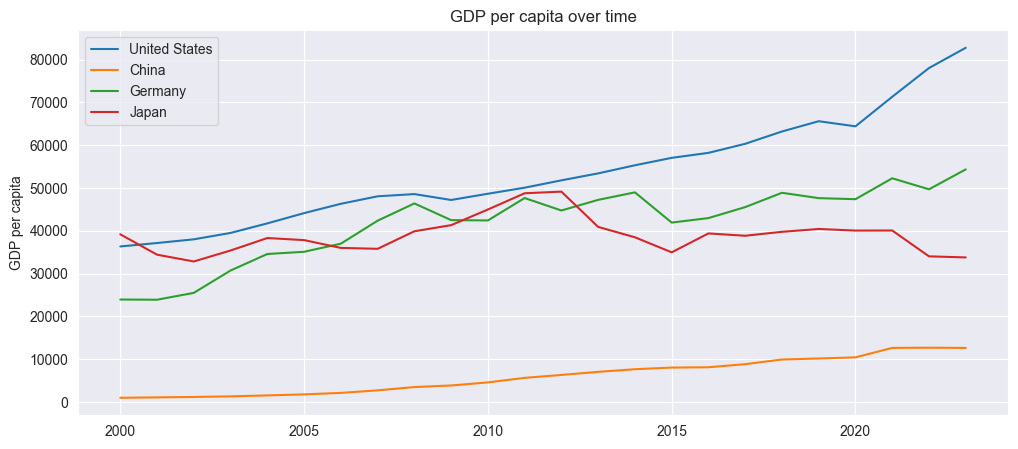

In [13]:
df['GDP_per_capita'] = df['GDP'] / df['Population']
plt.figure(figsize=(12, 5))
for country in ['United States', 'China', 'Germany', 'Japan']:
    plt.plot(df[df['Country'] == country]['Year'], df[df['Country'] == country]['GDP_per_capita'], label=country)
plt.legend()
plt.title('GDP per capita over time')
plt.ylabel('GDP per capita')
plt.show()

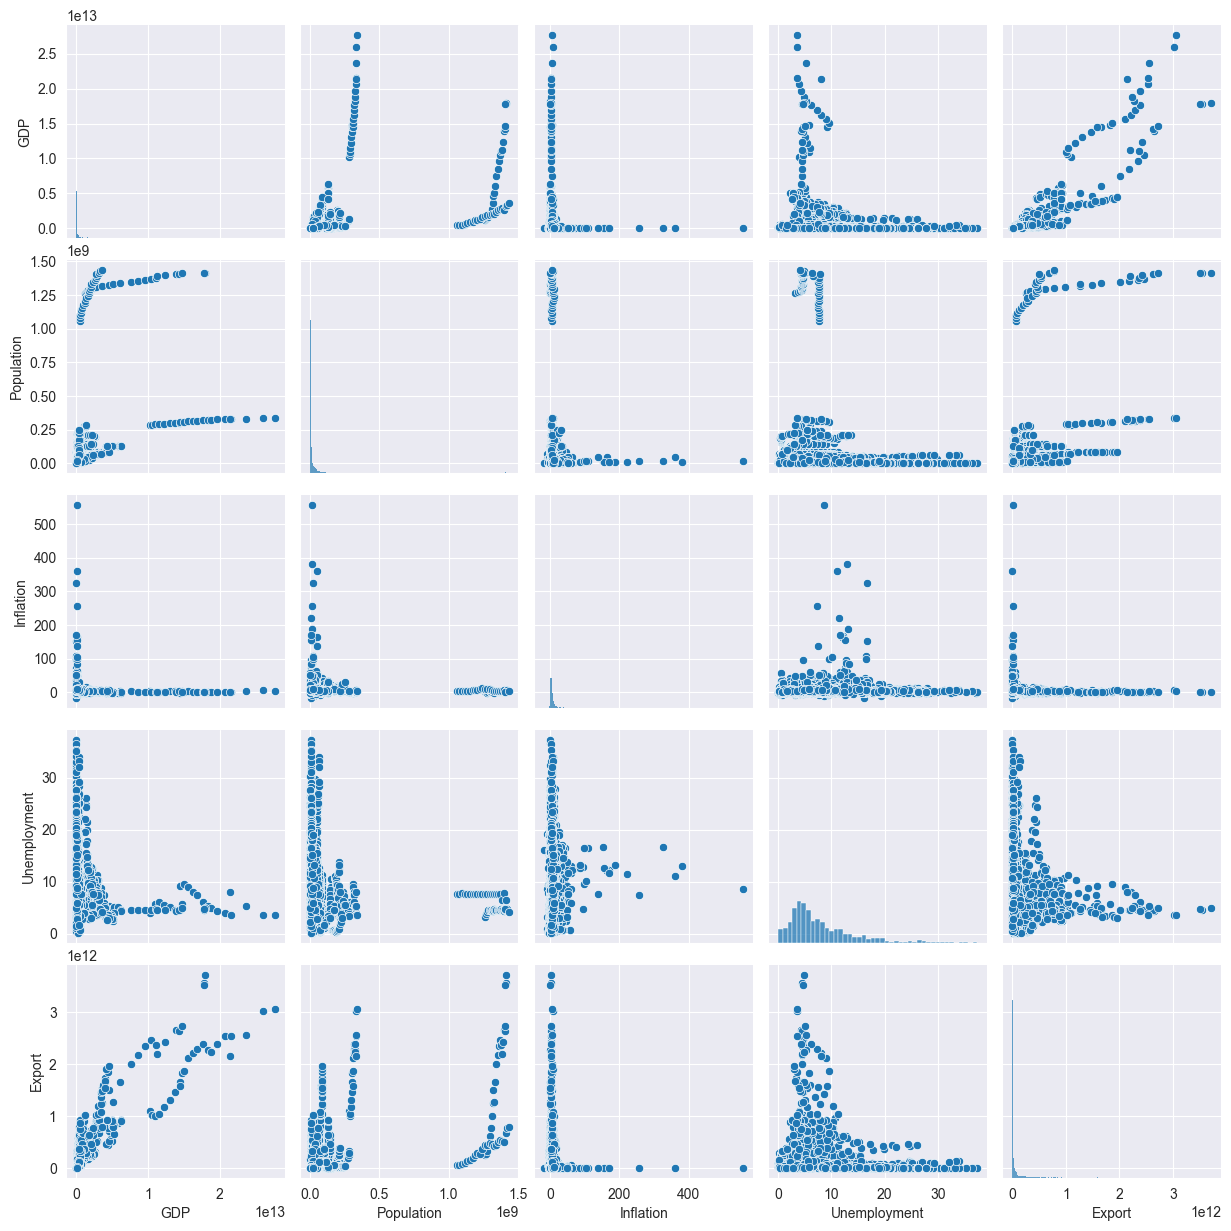

In [14]:
import seaborn as sns
sns.pairplot(df[['GDP','Population','Inflation','Unemployment','Export']])
plt.show()

In [15]:
top_capita = df[df['Year']==2023].sort_values('GDP_per_capita', ascending=False).head(10)
print(top_capita[['Country', 'GDP_per_capita']])

              Country  GDP_per_capita
16907          Monaco   256580.515123
16902      Luxembourg   128678.189943
16785         Bermuda   125841.602522
16869         Ireland   103887.800388
16795     Switzerland    99564.710026
16810  Cayman Islands    97749.507896
16935          Norway    87925.094419
16966       Singapore    84734.255921
17009   United States    82769.412211
16958           Qatar    80195.874647


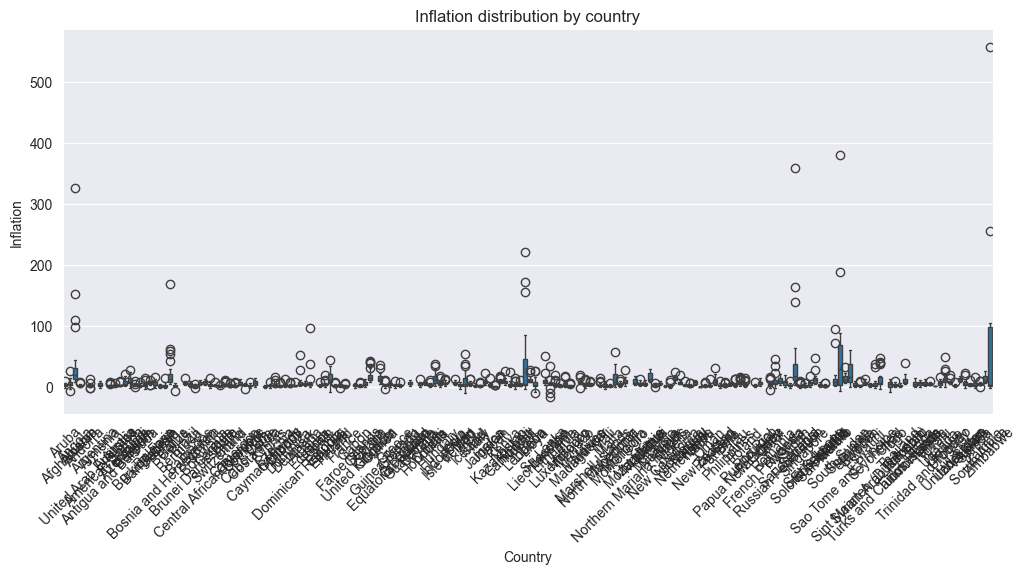

In [16]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Country', y='Inflation', data=df)
plt.xticks(rotation=45)
plt.title('Inflation distribution by country')
plt.show()

Data Preprocessing

In [17]:

df = df.drop(columns=['Debt'])

countries_before = df['Country'].nunique()
rows_before = df.shape[0]

for col in ['Inflation', 'Unemployment', 'Export']:
    df[col] = df.groupby('Country')[col].transform(lambda x: x.fillna(x.mean()))

df = df.dropna(subset=['GDP'])

df = df.dropna()

countries_after = df['Country'].nunique()
rows_after = df.shape[0]

print("Missing values after full preprocessing:\n", df.isnull().sum())
print("Final shape:", df.shape)
print("Countries before dropna:", countries_before)
print("Countries after dropna:", countries_after)
print("Rows before dropna:", rows_before)
print("Rows after dropna:", rows_after)



Missing values after full preprocessing:
 Country           0
Year              0
GDP               0
Population        0
Inflation         0
Unemployment      0
Export            0
GDP_per_capita    0
dtype: int64
Final shape: (3483, 8)
Countries before dropna: 186
Countries after dropna: 146
Rows before dropna: 4464
Rows after dropna: 3483


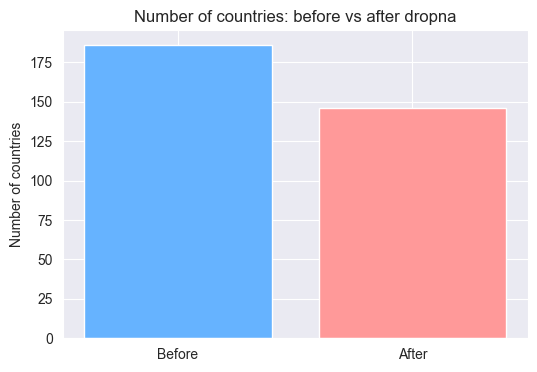

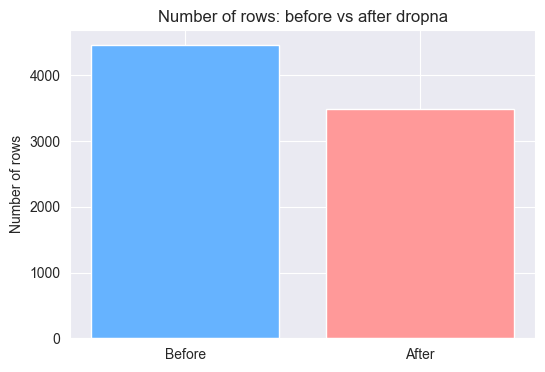

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(['Before', 'After'], [countries_before, countries_after], color=['#66b3ff', '#ff9999'])
plt.title('Number of countries: before vs after dropna')
plt.ylabel('Number of countries')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Before', 'After'], [rows_before, rows_after], color=['#66b3ff', '#ff9999'])
plt.title('Number of rows: before vs after dropna')
plt.ylabel('Number of rows')
plt.show()

# 8. (Optional) Сохраняем чистый датасет
df.to_csv('macro_preprocessed.csv', index=False)


Feature Engineering

In [19]:
df = df.sort_values(['Country', 'Year'])
df['GDP_growth'] = df.groupby('Country')['GDP'].pct_change(fill_method=None)


In [20]:
df['Population_growth'] = df.groupby('Country')['Population'].pct_change(fill_method=None)

In [21]:

df['Export_to_GDP'] = df['Export'] / df['GDP']



In [22]:
df['GDP_growth'] = df['GDP_growth'].fillna(0)
df['Population_growth'] = df['Population_growth'].fillna(0)
df['Population'] = df['Population'].astype(int)


In [23]:
df.head(30)

,Country,Year,GDP,Population,Inflation,Unemployment,Export,GDP_per_capita,GDP_growth,Population_growth,Export_to_GDP
10642,Afghanistan,2000,3.521418e+09,20130327,5.877462,7.935,2.420057e+09,174.930991,0.000000,0.000000,0.687239
10908,Afghanistan,2001,2.813572e+09,20284307,5.877462,7.953,2.420057e+09,138.706822,-0.201012,0.007649,0.860137
11174,Afghanistan,2002,3.825701e+09,21378117,5.877462,7.930,2.420057e+09,178.954088,0.359731,0.053924,0.632579
11440,Afghanistan,2003,4.520947e+09,22733049,5.877462,7.880,2.420057e+09,198.871116,0.181730,0.063379,0.535299
11706,Afghanistan,2004,5.224897e+09,23560654,5.877462,7.899,2.420057e+09,221.763654,0.155709,0.036405,0.463178
11972,Afghanistan,2005,6.203257e+09,24404567,12.686269,7.885,2.420057e+09,254.184249,0.187250,0.035819,0.390127
12238,Afghanistan,2006,6.971758e+09,25424094,6.784597,7.914,2.420057e+09,274.218554,0.123887,0.041776,0.347123
12504,Afghanistan,2007,9.747886e+09,25909852,8.680571,7.817,2.420057e+09,376.223152,0.398196,0.019106,0.248265
12770,Afghanistan,2008,1.010930e+10,26482622,26.418664,7.878,2.420057e+09,381.733238,0.037076,0.022106,0.239389
13036,Afghanistan,2009,1.241615e+10,27466101,-6.811161,7.754,2.420057e+09,452.053705,0.228192,0.037137,0.194912


In [24]:
df.shape

(3483, 11)

In [25]:
from sklearn.preprocessing import StandardScaler

exclude = ['GDP', 'Country', 'Year']
feature_cols = [col for col in df.columns if col not in exclude]

train = df[df['Year'] <= 2020]
test = df[df['Year'] > 2020]

X_train = train[feature_cols]
y_train = train['GDP']
X_test = test[feature_cols]
y_test = test['GDP']


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)
print("Train years:", train['Year'].unique())
print("Test years:", test['Year'].unique())


Train shape: (3053, 8)
Test shape: (430, 8)
Train years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]
Test years: [2021 2022 2023]


“To better reflect a real-world forecasting scenario and avoid data leakage, we split our data by years: 2000–2020 for training, 2021–2023 for testing. Standardization was performed on training data only, and the same scaling was applied to the test set.”

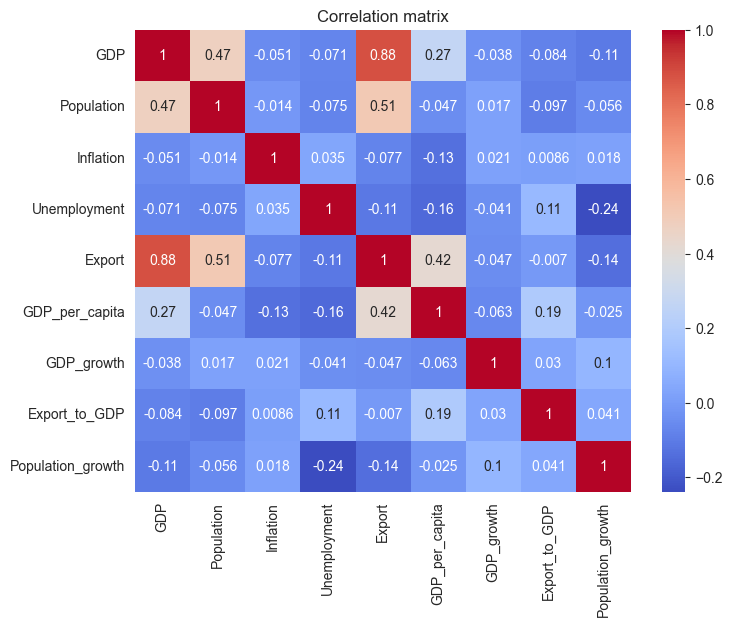

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['GDP','Population','Inflation','Unemployment','Export','GDP_per_capita','GDP_growth','Export_to_GDP','Population_growth']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

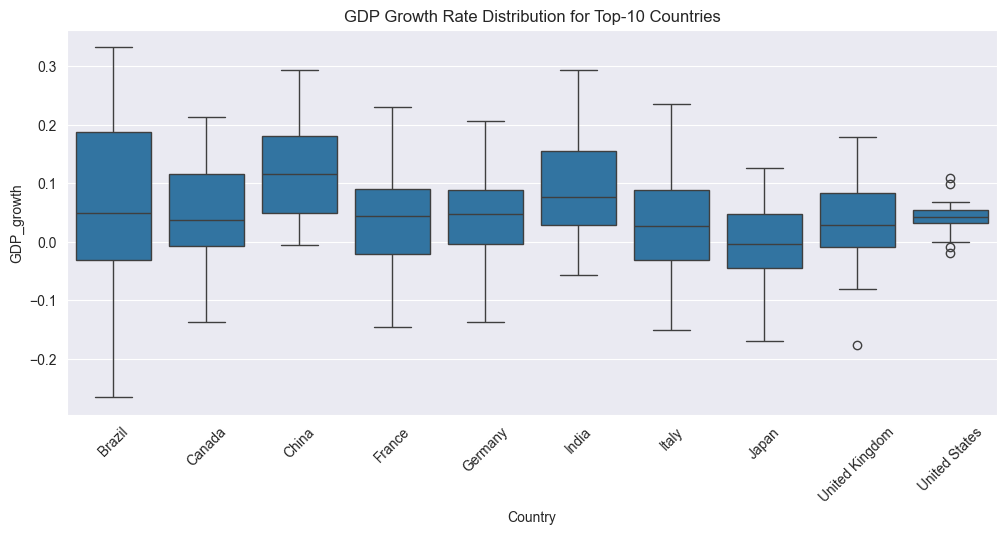

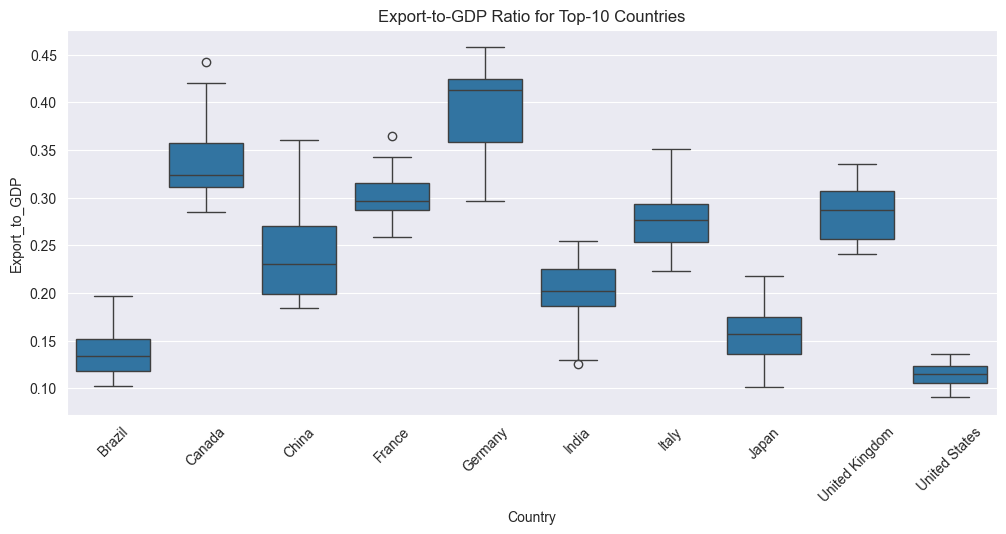

In [27]:
top10 = df.groupby('Country')['GDP'].mean().sort_values(ascending=False).head(10).index

plt.figure(figsize=(12, 5))
sns.boxplot(x='Country', y='GDP_growth', data=df[df['Country'].isin(top10)])
plt.title('GDP Growth Rate Distribution for Top-10 Countries')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='Country', y='Export_to_GDP', data=df[df['Country'].isin(top10)])
plt.title('Export-to-GDP Ratio for Top-10 Countries')
plt.xticks(rotation=45)
plt.show()


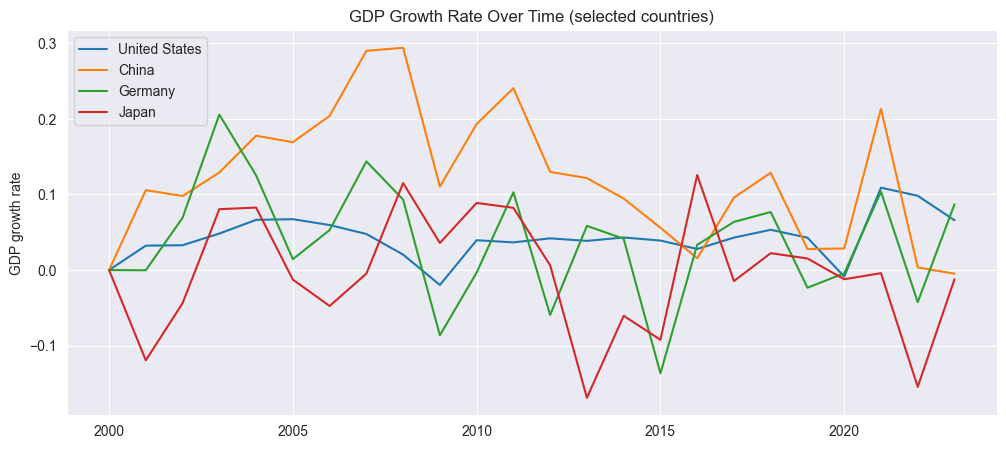

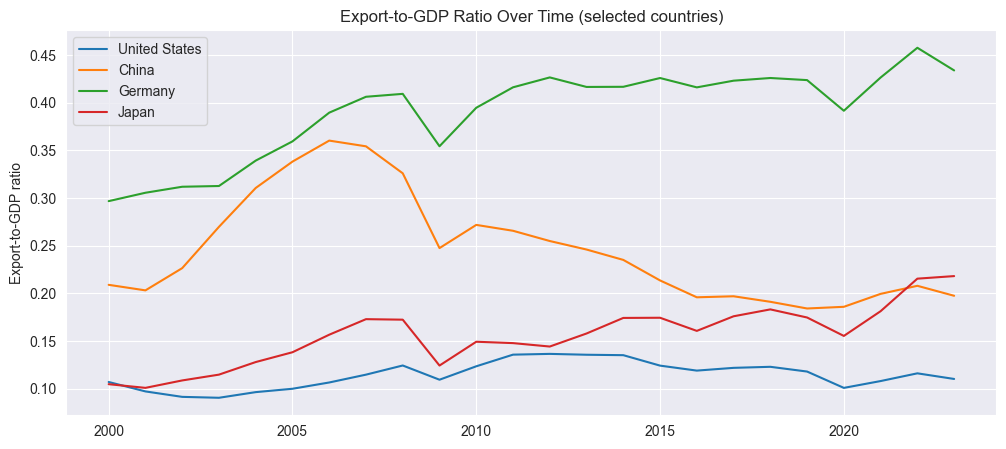

In [28]:
plt.figure(figsize=(12, 5))
for country in ['United States', 'China', 'Germany', 'Japan']:
    plt.plot(df[df['Country'] == country]['Year'],
             df[df['Country'] == country]['GDP_growth'],
             label=country)
plt.legend()
plt.title('GDP Growth Rate Over Time (selected countries)')
plt.ylabel('GDP growth rate')
plt.show()

plt.figure(figsize=(12, 5))
for country in ['United States', 'China', 'Germany', 'Japan']:
    plt.plot(df[df['Country'] == country]['Year'],
             df[df['Country'] == country]['Export_to_GDP'],
             label=country)
plt.legend()
plt.title('Export-to-GDP Ratio Over Time (selected countries)')
plt.ylabel('Export-to-GDP ratio')
plt.show()


Modelling

In [29]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# --- МОДЕЛИ ---
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
voting = VotingRegressor([('lr', lr), ('ridge', ridge), ('rf', rf)])

models = {
    "Linear Regression": lr,
    "Ridge Regression": ridge,
    "Random Forest": rf,
    "Voting": voting
}

# --- МЕТРИКИ ДЛЯ КРОСС-ВАЛИДАЦИИ ---
scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

# --- КРОСС-ВАЛИДАЦИЯ НА TRAIN ---
results = []
for name, model in models.items():
    scores = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=scoring)
    results.append({
        'Model': name,
        'RMSE': -scores['test_RMSE'].mean(),
        'MAE': -scores['test_MAE'].mean(),
        'R2': scores['test_R2'].mean()
    })

cv_df = pd.DataFrame(results)
print("Cross-validation results (train set):\n", cv_df)

# --- ОБУЧЕНИЕ НА ВСЁМ TRAIN + ТЕСТ НА TEST ---
test_results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    # Исправленный RMSE для старых версий sklearn:
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    test_results.append({'Model': name, 'Test RMSE': rmse, 'Test MAE': mae, 'Test R2': r2})

test_df = pd.DataFrame(test_results)
print("\nTest set results:\n", test_df)


Cross-validation results (train set):
                Model          RMSE           MAE        R2
0  Linear Regression  8.549841e+11  3.316693e+11  0.266031
1   Ridge Regression  8.545246e+11  3.313180e+11  0.267244
2      Random Forest  8.132107e+11  1.835929e+11  0.589526
3             Voting  8.113345e+11  2.748447e+11  0.500614

Test set results:
                Model     Test RMSE      Test MAE   Test R2
0  Linear Regression  1.219172e+12  4.339491e+11  0.792783
1   Ridge Regression  1.219197e+12  4.336542e+11  0.792775
2      Random Forest  6.670040e+11  1.262492e+11  0.937977
3             Voting  9.687458e+11  3.136609e+11  0.869168


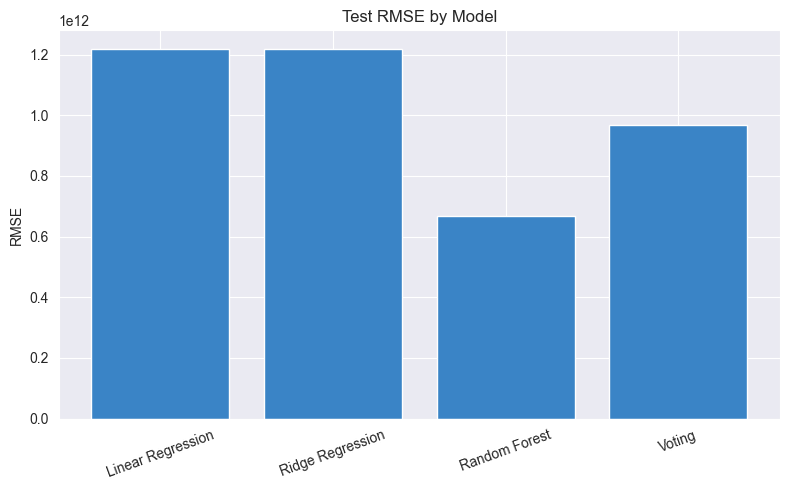

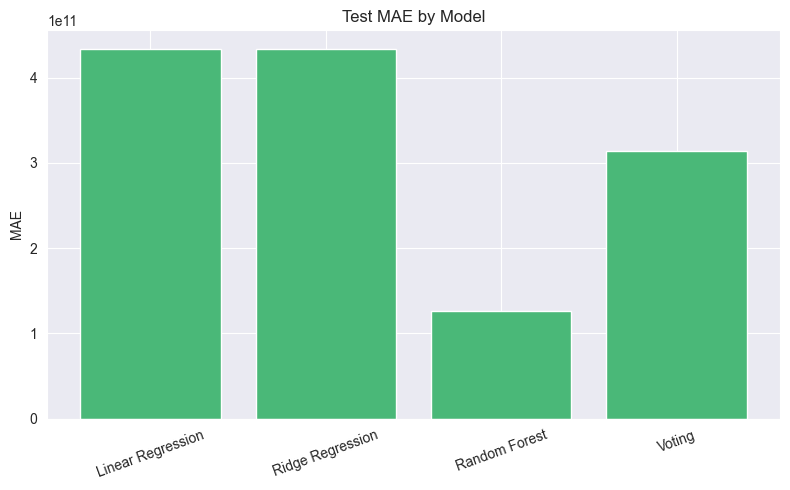

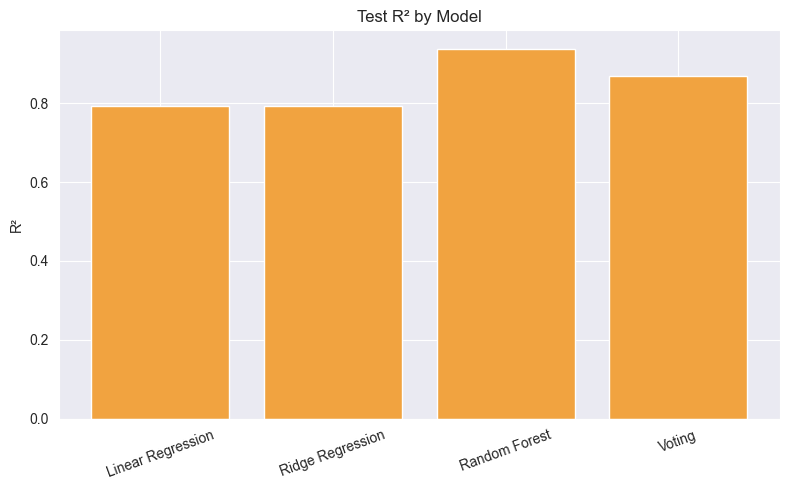

In [30]:
import matplotlib.pyplot as plt

# 1. Barplot RMSE (Test set)
plt.figure(figsize=(8,5))
plt.bar(test_df['Model'], test_df['Test RMSE'], color='#3A84C6')
plt.title('Test RMSE by Model')
plt.ylabel('RMSE')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# 2. Barplot MAE (Test set)
plt.figure(figsize=(8,5))
plt.bar(test_df['Model'], test_df['Test MAE'], color='#4AB878')
plt.title('Test MAE by Model')
plt.ylabel('MAE')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# 3. Barplot R2 (Test set)
plt.figure(figsize=(8,5))
plt.bar(test_df['Model'], test_df['Test R2'], color='#F1A340')
plt.title('Test R² by Model')
plt.ylabel('R²')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


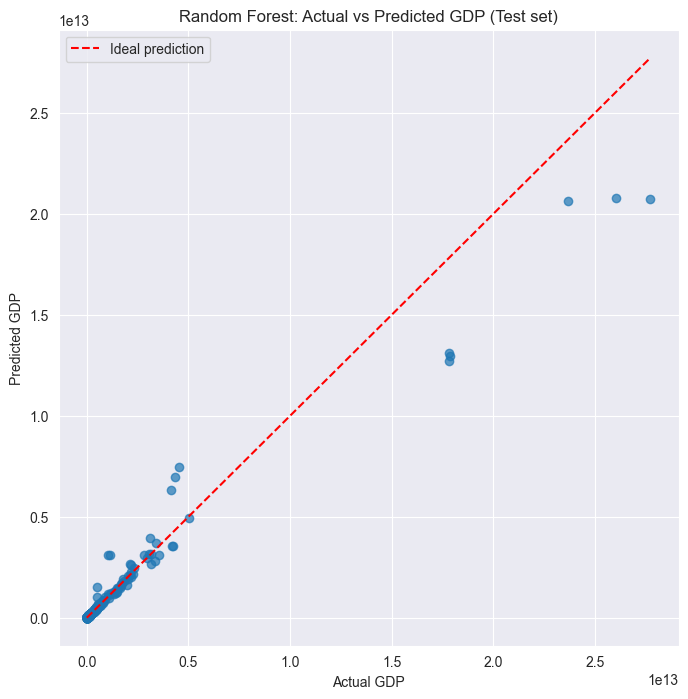

In [31]:
import matplotlib.pyplot as plt

# Обучаем RF на всём train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal prediction')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Random Forest: Actual vs Predicted GDP (Test set)')
plt.legend()
plt.show()


In [32]:
test_results = test.copy()
test_results['Predicted_GDP'] = y_pred
test_results['Actual_GDP'] = y_test.values


In [33]:
print(test_results.groupby('Country')[['Predicted_GDP', 'Actual_GDP']].mean())


             Predicted_GDP    Actual_GDP
Country                                 
Afghanistan   2.086643e+10  1.533010e+10
Albania       1.964651e+10  2.019881e+10
Algeria       2.169325e+11  2.198319e+11
Angola        8.837797e+10  8.524318e+10
Armenia       1.901784e+10  1.915939e+10
...                    ...           ...
Uzbekistan    8.617874e+10  8.967592e+10
Vanuatu       8.176908e+08  1.032976e+09
Viet Nam      4.052674e+11  4.021719e+11
Zambia        2.644463e+10  2.627939e+10
Zimbabwe      3.184590e+10  3.175388e+10

[145 rows x 2 columns]


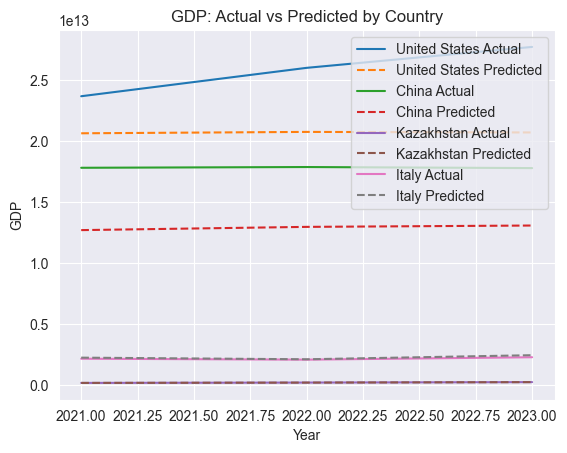

In [34]:
import matplotlib.pyplot as plt

for country in ['United States','China','Kazakhstan','Italy']:
    data = test_results[test_results['Country'] == country].sort_values('Year')
    plt.plot(data['Year'], data['Actual_GDP'], label=f'{country} Actual')
    plt.plot(data['Year'], data['Predicted_GDP'], '--', label=f'{country} Predicted')
plt.legend()
plt.title('GDP: Actual vs Predicted by Country')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()


Model Tuning

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_root_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)
print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge RMSE (CV):", -ridge_grid.best_score_)
ridge_best = ridge_grid.best_estimator_

Best Ridge alpha: {'alpha': 100}
Best Ridge RMSE (CV): 819857515490.6498


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 8, 10, 12, 15, 20],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2', 0.7, 0.9]  # убрали 'auto'
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print("Best RF params (RandomizedSearch):", random_search.best_params_)
print("Best RF RMSE (CV):", -random_search.best_score_)

rf_best_random = random_search.best_estimator_

y_pred = rf_best_random.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RandomizedSearch RF — Test RMSE: {rmse:.2e}, MAE: {mae:.2e}, R2: {r2:.4f}")


Best RF params (RandomizedSearch): {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 0.7, 'max_depth': 12}
Best RF RMSE (CV): 778772273726.5524
RandomizedSearch RF — Test RMSE: 8.51e+11, MAE: 1.51e+11, R2: 0.8991


In [37]:
from sklearn.ensemble import VotingRegressor

voting_best = VotingRegressor([
    ('ridge', ridge_best),
    ('rf', rf_best_random),
    ('lr',lr)
])
voting_best.fit(X_train_scaled, y_train)


VotingRegressor(estimators=[('ridge', Ridge(alpha=100)),
                            ('rf',
                             RandomForestRegressor(max_depth=12,
                                                   max_features=0.7,
                                                   min_samples_leaf=5,
                                                   n_estimators=300,
                                                   random_state=42)),
                            ('lr', LinearRegression())])

In [38]:
# Словарь моделей после тюнинга:
models_final = {
    "Linear Regression": lr,                  # обычная линейная
    "Ridge (tuned)": ridge_best,              # tuned Ridge
    "Random Forest (tuned)": rf_best_random,  # tuned RF
    "Voting (tuned)": voting_best             # Voting из tuned моделей
}

test_results = []
for name, model in models_final.items():
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    test_results.append({'Model': name, 'Test RMSE': rmse, 'Test MAE': mae, 'Test R2': r2})

test_df_tuned = pd.DataFrame(test_results)
test_df['Type'] = 'Untuned'
test_df_tuned['Type'] = 'Tuned'

compare_df = pd.concat([test_df, test_df_tuned], ignore_index=True)
print(compare_df)

                   Model     Test RMSE      Test MAE   Test R2     Type
0      Linear Regression  1.219172e+12  4.339491e+11  0.792783  Untuned
1       Ridge Regression  1.219197e+12  4.336542e+11  0.792775  Untuned
2          Random Forest  6.670040e+11  1.262492e+11  0.937977  Untuned
3                 Voting  9.687458e+11  3.136609e+11  0.869168  Untuned
4      Linear Regression  1.219172e+12  4.339491e+11  0.792783    Tuned
5          Ridge (tuned)  1.225959e+12  4.066098e+11  0.790470    Tuned
6  Random Forest (tuned)  8.507505e+11  1.511492e+11  0.899098    Tuned
7         Voting (tuned)  1.032221e+12  3.161810e+11  0.851461    Tuned


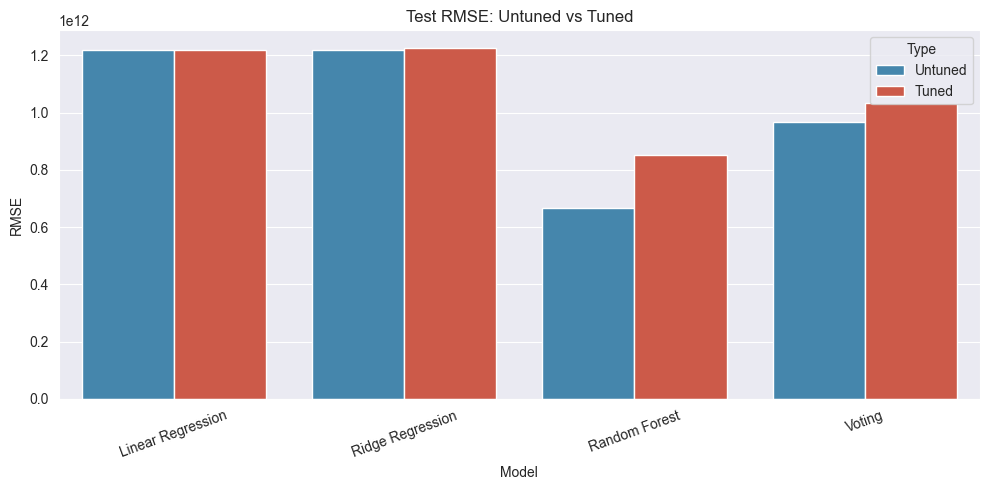

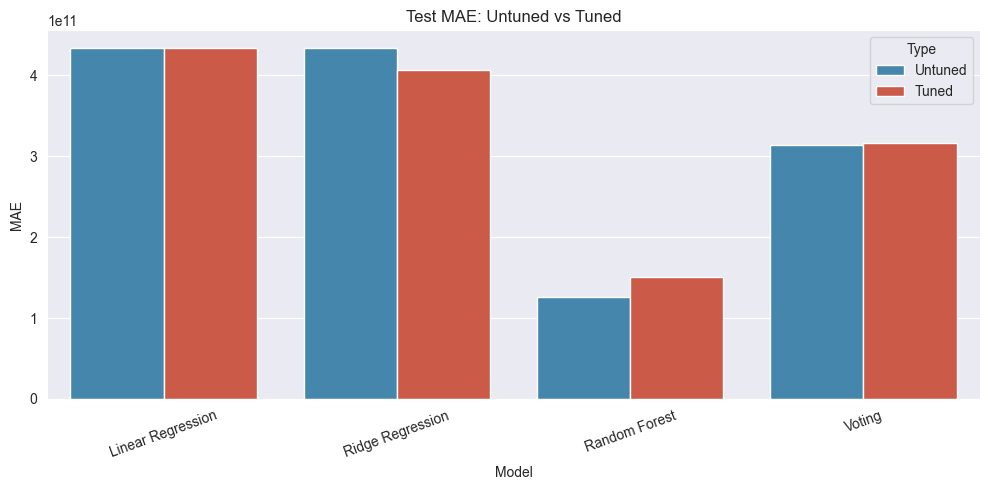

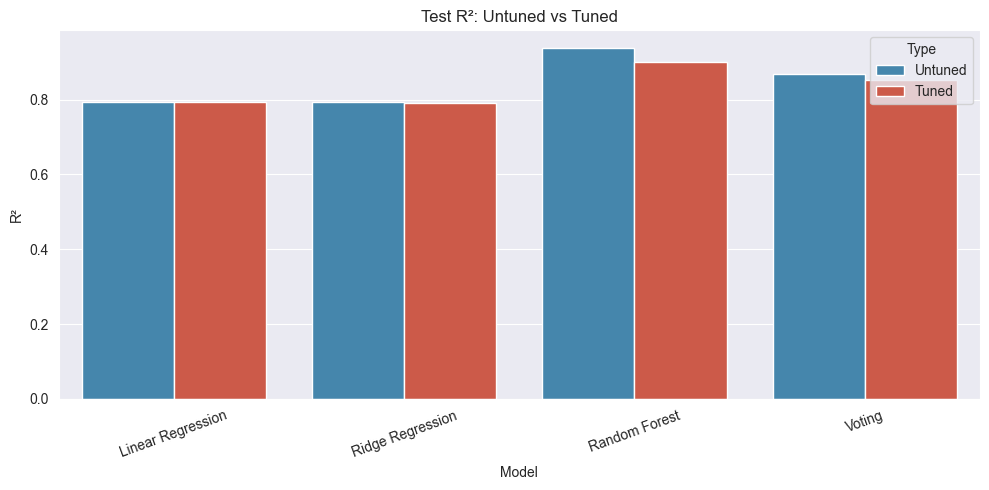

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grouped_bar(compare_df, metric_col, title=None, ylabel=None):
    model_map = {
        'Ridge (tuned)': 'Ridge Regression',
        'Random Forest (tuned)': 'Random Forest',
        'Voting (tuned)': 'Voting',
    }
    df = compare_df.copy()
    df['Model'] = df['Model'].replace(model_map)
    order = ['Linear Regression', 'Ridge Regression', 'Random Forest', 'Voting']

    plt.figure(figsize=(10,5))
    sns.barplot(
        data=df,
        x='Model',
        y=metric_col,
        hue='Type',
        order=order,
        palette=['#348ABD', '#E24A33']
    )
    if not title:
        title = f'{metric_col}: Untuned vs Tuned (Grouped)'
    plt.title(title)
    plt.ylabel(ylabel if ylabel else metric_col)
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

plot_grouped_bar(compare_df, 'Test RMSE', title='Test RMSE: Untuned vs Tuned', ylabel='RMSE')
plot_grouped_bar(compare_df, 'Test MAE', title='Test MAE: Untuned vs Tuned', ylabel='MAE')
plot_grouped_bar(compare_df, 'Test R2',  title='Test R²: Untuned vs Tuned', ylabel='R²')


A fair evaluation on the holdout test showed that Random Forest without tuning provides the best prediction quality. This highlights the importance of using a test set to fairly test models and that tuning is not always a guaranteed improvement.

Interpretation


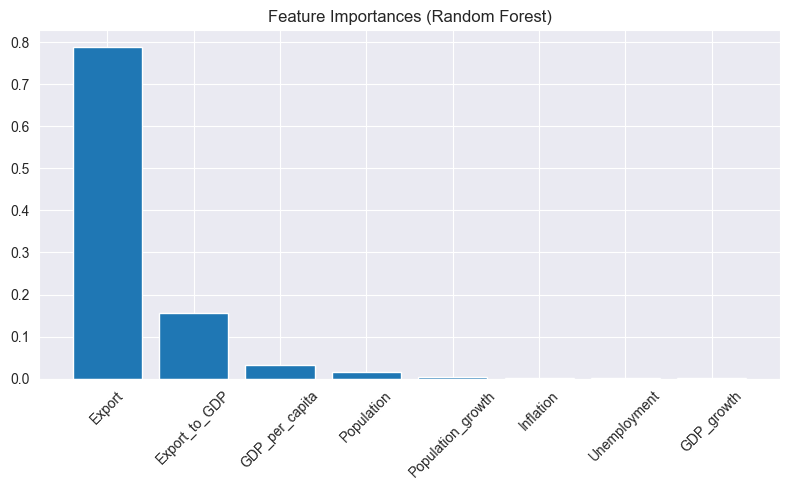

             Feature  Importance
3             Export    0.788195
7      Export_to_GDP    0.156435
4     GDP_per_capita    0.032524
0         Population    0.015206
6  Population_growth    0.004956
1          Inflation    0.001152
2       Unemployment    0.000824
5         GDP_growth    0.000707


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Важно! RF должен быть обучен на всех train-данных до 2023 года
rf.fit(X_train_scaled, y_train)

# Получим значения feature_importances_
importances = rf.feature_importances_
feature_names = X_train.columns

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.bar(fi_df['Feature'], fi_df['Importance'])
plt.title('Feature Importances (Random Forest)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(fi_df)


In [41]:
# Обучаем на всём df до 2023 включительно
full_train = df[df['Year'] <= 2023]
X_full = full_train[feature_cols]
y_full = full_train['GDP']

# Скейлим на всём train (важно: fit только на train!)
scaler_final = StandardScaler()
X_full_scaled = scaler_final.fit_transform(X_full)

rf.fit(X_full_scaled, y_full)


RandomForestRegressor(random_state=42)

Future

In [42]:
from sklearn.linear_model import LinearRegression

def forecast_feature(df, feature, years_to_predict):
    forecasts = []
    for country in df['Country'].unique():
        country_data = df[df['Country'] == country]
        X_train = country_data['Year'].values.reshape(-1, 1)
        y_train = country_data[feature].values
        if len(y_train) < 2 or np.isnan(y_train).all():
            continue  # пропускаем, если нет данных для тренда
        model = LinearRegression()
        model.fit(X_train, y_train)
        for year in years_to_predict:
            y_pred = model.predict(np.array([[year]]))[0]
            forecasts.append({'Country': country, 'Year': year, feature: y_pred})
    return pd.DataFrame(forecasts)

future_years = np.arange(2024, 2031)

pop_future         = forecast_feature(df[['Country','Year','Population']], 'Population', future_years)
inflation_future   = forecast_feature(df[['Country','Year','Inflation']], 'Inflation', future_years)
unemployment_future= forecast_feature(df[['Country','Year','Unemployment']], 'Unemployment', future_years)
export_future      = forecast_feature(df[['Country','Year','Export']], 'Export', future_years)


In [43]:
print(pop_future.head(20))



        Country  Year    Population
0   Afghanistan  2024  4.240950e+07
1   Afghanistan  2025  4.336791e+07
2   Afghanistan  2026  4.432632e+07
3   Afghanistan  2027  4.528473e+07
4   Afghanistan  2028  4.624314e+07
5   Afghanistan  2029  4.720156e+07
6   Afghanistan  2030  4.815997e+07
7       Albania  2024  2.764180e+06
8       Albania  2025  2.751506e+06
9       Albania  2026  2.738832e+06
10      Albania  2027  2.726158e+06
11      Albania  2028  2.713484e+06
12      Albania  2029  2.700811e+06
13      Albania  2030  2.688137e+06
14      Algeria  2024  4.644161e+07
15      Algeria  2025  4.713300e+07
16      Algeria  2026  4.782439e+07
17      Algeria  2027  4.851579e+07
18      Algeria  2028  4.920718e+07
19      Algeria  2029  4.989857e+07


In [44]:
inflation_future.head(20)

,Country,Year,Inflation
0,Afghanistan,2024,3.229857
1,Afghanistan,2025,3.018049
2,Afghanistan,2026,2.806240
3,Afghanistan,2027,2.594432
4,Afghanistan,2028,2.382623
5,Afghanistan,2029,2.170815
6,Afghanistan,2030,1.959006
7,Albania,2024,2.835529
8,Albania,2025,2.851100
9,Albania,2026,2.866672


In [45]:
from functools import reduce

dfs = [pop_future, inflation_future, unemployment_future, export_future]
future = reduce(lambda left, right: pd.merge(left, right, on=['Country', 'Year'], how='outer'), dfs)
print(future.head())


       Country  Year    Population  Inflation  Unemployment        Export
0  Afghanistan  2024  4.240950e+07   3.229857     12.371134  2.436651e+09
1  Afghanistan  2025  4.336791e+07   3.018049     12.618731  2.437979e+09
2  Afghanistan  2026  4.432632e+07   2.806240     12.866329  2.439306e+09
3  Afghanistan  2027  4.528473e+07   2.594432     13.113926  2.440634e+09
4  Afghanistan  2028  4.624314e+07   2.382623     13.361524  2.441961e+09


In [46]:
future.shape

(1022, 6)

In [47]:
feature_cols = ['Population', 'Inflation', 'Unemployment', 'Export']  # и другие “честные” признаки, если есть!


X_full = full_train[feature_cols]
scaler_final = StandardScaler()
X_full_scaled = scaler_final.fit_transform(X_full)
rf.fit(X_full_scaled, y_full)



RandomForestRegressor(random_state=42)

In [48]:
X_future = future[feature_cols]
X_future_scaled = scaler_final.transform(X_future)
future['Predicted_GDP'] = rf.predict(X_future_scaled)


In [49]:
future

,Country,Year,Population,Inflation,Unemployment,Export,Predicted_GDP
0,Afghanistan,2024,4.240950e+07,3.229857,12.371134,2.436651e+09,2.491727e+10
1,Afghanistan,2025,4.336791e+07,3.018049,12.618731,2.437979e+09,2.536984e+10
2,Afghanistan,2026,4.432632e+07,2.806240,12.866329,2.439306e+09,2.608772e+10
3,Afghanistan,2027,4.528473e+07,2.594432,13.113926,2.440634e+09,2.618755e+10
4,Afghanistan,2028,4.624314e+07,2.382623,13.361524,2.441961e+09,2.734398e+10
...,...,...,...,...,...,...,...
1017,Zimbabwe,2026,1.664161e+07,131.122528,8.654135,8.091330e+09,2.793399e+10
1018,Zimbabwe,2027,1.683695e+07,134.675023,8.835199,8.368319e+09,2.697968e+10
1019,Zimbabwe,2028,1.703230e+07,138.227518,9.016263,8.645308e+09,2.746558e+10
1020,Zimbabwe,2029,1.722765e+07,141.780013,9.197327,8.922297e+09,2.812191e+10


In [50]:
# 1. Derived features для future (2024–2030)
future['GDP_per_capita'] = future['Predicted_GDP'] / future['Population']
future['Export_to_GDP'] = future['Export'] / future['Predicted_GDP']
future = future.sort_values(['Country', 'Year'])
future['GDP_growth'] = future.groupby('Country')['Predicted_GDP'].pct_change()

# 2. Для исторических данных (df), оставь/переименуй GDP в 'Predicted_GDP' для удобства объединения:
df['Predicted_GDP'] = df['GDP']  # Только для объединения, чтобы все было в одной колонке

# 3. Оставь только нужные колонки в обоих DataFrame:
keep_cols = ['Country', 'Year', 'Population', 'Inflation', 'Unemployment', 'Export',
             'Predicted_GDP', 'GDP_per_capita', 'Export_to_GDP', 'GDP_growth']

df_history = df[df['Year'] <= 2023][keep_cols]
df_future = future[keep_cols]

full_results = pd.concat([df_history, df_future], ignore_index=True)

full_results = full_results.sort_values(['Country', 'Year']).reset_index(drop=True)


In [51]:
full_results

,Country,Year,Population,Inflation,Unemployment,Export,Predicted_GDP,GDP_per_capita,Export_to_GDP,GDP_growth
0,Afghanistan,2000,2.013033e+07,5.877462,7.935000,2.420057e+09,3.521418e+09,174.930991,0.687239,0.000000
1,Afghanistan,2001,2.028431e+07,5.877462,7.953000,2.420057e+09,2.813572e+09,138.706822,0.860137,-0.201012
2,Afghanistan,2002,2.137812e+07,5.877462,7.930000,2.420057e+09,3.825701e+09,178.954088,0.632579,0.359731
3,Afghanistan,2003,2.273305e+07,5.877462,7.880000,2.420057e+09,4.520947e+09,198.871116,0.535299,0.181730
4,Afghanistan,2004,2.356065e+07,5.877462,7.899000,2.420057e+09,5.224897e+09,221.763654,0.463178,0.155709
...,...,...,...,...,...,...,...,...,...,...
4500,Zimbabwe,2026,1.664161e+07,131.122528,8.654135,8.091330e+09,2.793399e+10,1678.562930,0.289659,-0.038583
4501,Zimbabwe,2027,1.683695e+07,134.675023,8.835199,8.368319e+09,2.697968e+10,1602.408600,0.310171,-0.034163
4502,Zimbabwe,2028,1.703230e+07,138.227518,9.016263,8.645308e+09,2.746558e+10,1612.558382,0.314769,0.018010
4503,Zimbabwe,2029,1.722765e+07,141.780013,9.197327,8.922297e+09,2.812191e+10,1632.370791,0.317272,0.023896


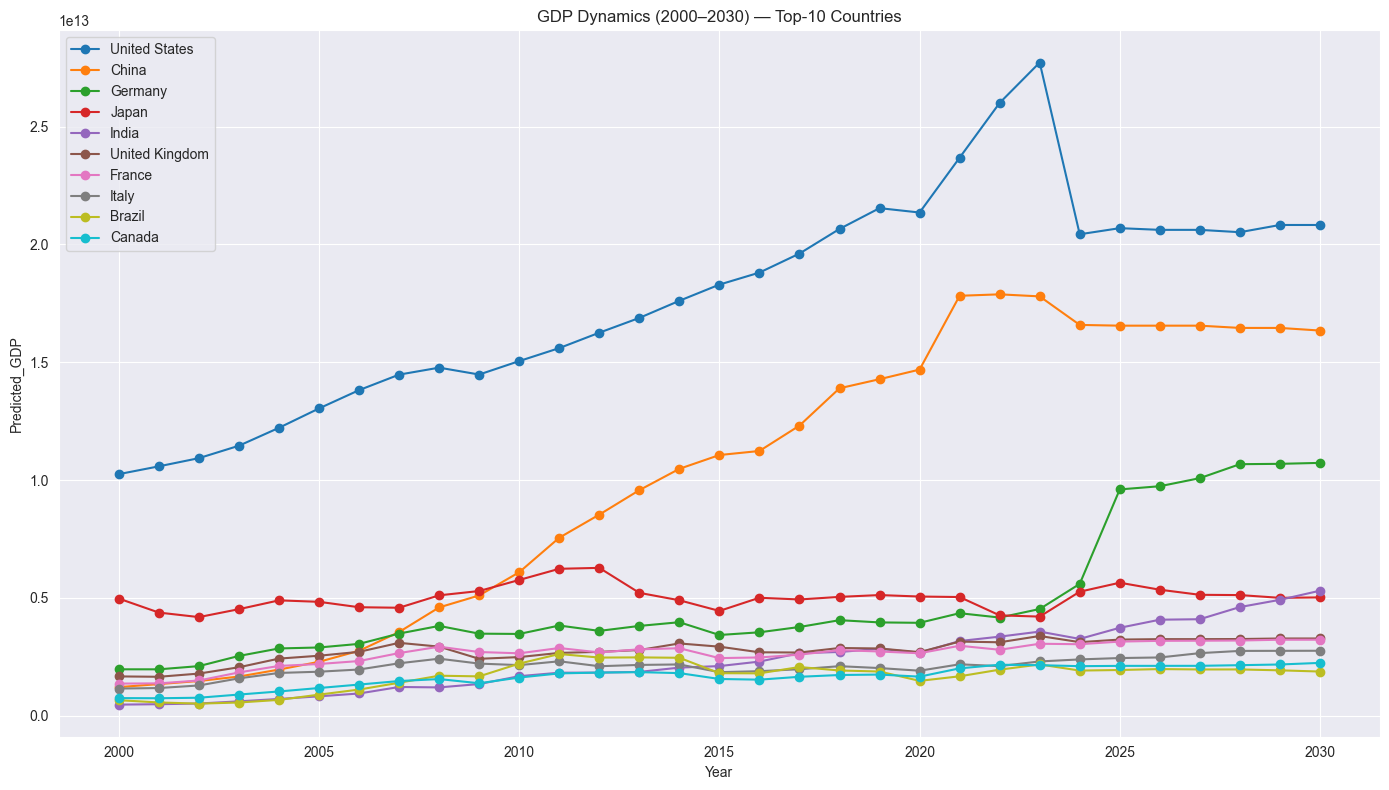

In [52]:
import matplotlib.pyplot as plt

last_real_year = full_results[full_results['Year'] <= 2023]['Year'].max()
top10 = (
    full_results[full_results['Year'] == last_real_year]
    .sort_values('Predicted_GDP', ascending=False)
    .head(10)['Country']
    .tolist()
)

# 2. Визуализация динамики GDP по годам
plt.figure(figsize=(14, 8))
for country in top10:
    data = full_results[full_results['Country'] == country].sort_values('Year')
    plt.plot(data['Year'], data['Predicted_GDP'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Predicted_GDP')
plt.title('GDP Dynamics (2000–2030) — Top-10 Countries')
plt.legend()
plt.tight_layout()
plt.show()


Comparison with IMF

In [84]:

imf_raw = pd.read_csv('imf.csv', sep=';', decimal=',')

print(imf_raw.head())
print(imf_raw.columns)


  GDP, current prices (Billions of U.S. dollars)     2024     2025     2026  \
0                                    Afghanistan  no data  no data  no data   
1                                        Albania   27,259   28,372   29,743   
2                                        Algeria  264,913  268,885  269,435   
3                                        Andorra    4,038    4,035    4,169   
4                                         Angola  115,946  113,343  109,384   

      2027     2028     2029     2030  
0  no data  no data  no data  no data  
1   31,382   33,354   35,462   37,683  
2   274,52  279,983  285,271  290,941  
3    4,301    4,438    4,583    4,732  
4  112,743  118,534  125,036  132,281  
Index(['GDP, current prices (Billions of U.S. dollars)', '2024', '2025',
       '2026', '2027', '2028', '2029', '2030'],
      dtype='object')


In [85]:
imf_raw

,"GDP, current prices (Billions of U.S. dollars)",2024,2025,2026,2027,2028,2029,2030
0,Afghanistan,no data,no data,no data,no data,no data,no data,no data
1,Albania,"27,259","28,372","29,743","31,382","33,354","35,462","37,683"
2,Algeria,"264,913","268,885","269,435","274,52","279,983","285,271","290,941"
3,Andorra,"4,038","4,035","4,169","4,301","4,438","4,583","4,732"
4,Angola,"115,946","113,343","109,384","112,743","118,534","125,036","132,281"
...,...,...,...,...,...,...,...,...
191,Vietnam,"459,472","490,97","518,999","553,437","589,412","626,91","666,539"
192,West Bank and Gaza,no data,no data,no data,no data,no data,no data,no data
193,Yemen,"19,101","17,401","17,285","18,762","21,713","23,602","25,717"
194,Zambia,"26,326","28,91","34,237","40,161","43,668","47,092","50,669"


In [116]:
import pandas as pd

# 1. Чтение файла
imf_raw = pd.read_csv('imf2.csv')



In [117]:
imf_raw

,Country,Year,IMF_GDP
0,Afghanistan,2024,NaN
1,Albania,2024,27.259
2,Algeria,2024,264.913
3,Andorra,2024,4.038
4,Angola,2024,115.946
...,...,...,...
1367,Vietnam,2030,666.539
1368,West Bank and Gaza,2030,NaN
1369,Yemen,2030,25.717
1370,Zambia,2030,50.669


In [121]:
# full_results['Predicted_GDP'] — в долларах, имф — в миллиардах
compare = pd.merge(
    full_results[['Country', 'Year', 'Predicted_GDP']],
    imf_raw,  # тут 'IMF_GDP' уже в миллиардах!
    on=['Country', 'Year'],
    how='inner'
)

# Переводим Predicted_GDP в миллиарды
compare['Predicted_GDP_B'] = compare['Predicted_GDP'] / 1_000_000_000

# Теперь можно сравнивать Predicted_GDP_B и IMF_GDP напрямую
print(compare.head())


       Country  Year  Predicted_GDP  IMF_GDP  Predicted_GDP_B
0  Afghanistan  2024   2.491727e+10      NaN        24.917270
1  Afghanistan  2025   2.536984e+10      NaN        25.369838
2  Afghanistan  2026   2.608772e+10      NaN        26.087723
3  Afghanistan  2027   2.618755e+10      NaN        26.187545
4  Afghanistan  2028   2.734398e+10      NaN        27.343976


In [123]:
compare

,Country,Year,Predicted_GDP,IMF_GDP,Predicted_GDP_B
0,Afghanistan,2024,2.491727e+10,NaN,24.917270
1,Afghanistan,2025,2.536984e+10,NaN,25.369838
2,Afghanistan,2026,2.608772e+10,NaN,26.087723
3,Afghanistan,2027,2.618755e+10,NaN,26.187545
4,Afghanistan,2028,2.734398e+10,NaN,27.343976
...,...,...,...,...,...
968,Zimbabwe,2026,2.793399e+10,39.491,27.933988
969,Zimbabwe,2027,2.697968e+10,40.925,26.979681
970,Zimbabwe,2028,2.746558e+10,42.340,27.465579
971,Zimbabwe,2029,2.812191e+10,43.836,28.121906


In [104]:
top3 = (
    compare[compare['Year'] >= 2024]
    .groupby('Country')['Predicted_GDP']
    .mean()
    .sort_values(ascending=False)
    .head(3)
    .index
    .tolist()
)
print(top10)


['United States', 'China', 'Germany', 'Japan', 'India', 'United Kingdom', 'France', 'Italy', 'Brazil', 'Canada']


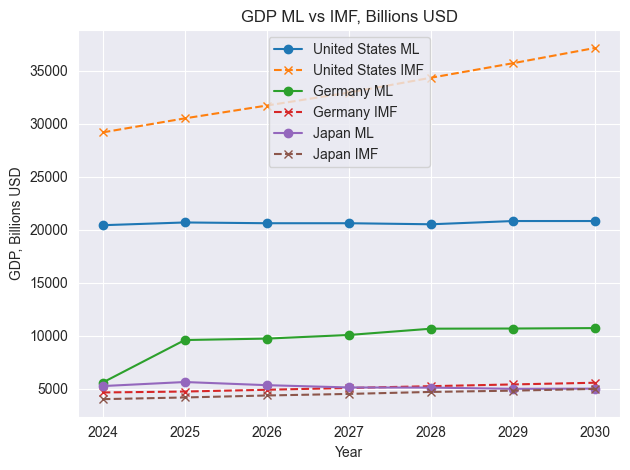

In [124]:
import matplotlib.pyplot as plt

for country in ['United States', 'Germany', 'Japan']:
    c = compare[compare['Country'] == country]
    plt.plot(c['Year'], c['Predicted_GDP_B'], marker='o', label=f'{country} ML')
    plt.plot(c['Year'], c['IMF_GDP'], marker='x', linestyle='--', label=f'{country} IMF')

plt.xlabel('Year')
plt.ylabel('GDP, Billions USD')
plt.title('GDP ML vs IMF, Billions USD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


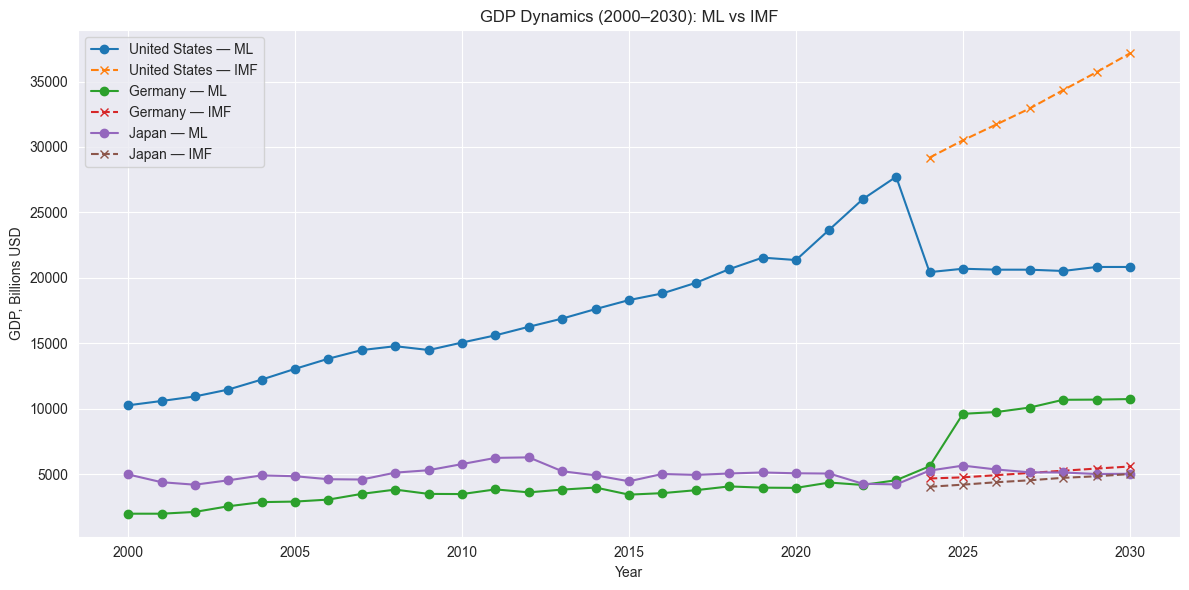

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in top3:
    # ML-модель: 2000–2030
    c_ml = full_results[(full_results['Country'] == country) & (full_results['Year'] >= 2000)]
    plt.plot(
        c_ml['Year'],
        c_ml['Predicted_GDP'] / 1_000_000_000,  # в миллиардах
        label=f'{country} — ML',
        marker='o'
    )

    # IMF: только 2024–2030
    c_imf = imf_raw[(imf_raw['Country'] == country) & (imf_raw['Year'] >= 2024)]
    plt.plot(
        c_imf['Year'],
        c_imf['IMF_GDP'],  # ВНИМАНИЕ: без деления! Уже в миллиардах!
        label=f'{country} — IMF',
        marker='x',
        linestyle='--'
    )

plt.xlabel('Year')
plt.ylabel('GDP, Billions USD')
plt.title('GDP Dynamics (2000–2030): ML vs IMF')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

